In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tuesday 30 11:10:36 2024
@author: Neha Gupta and team
"""

'\nCreated on Sunday 21 11:10:36 2024\n@author: Neha Gupta\n'

In [1]:
# Import the clear_output function from IPython.display module for clearing Jupyter Notebook cell output
from IPython.display import clear_output

## Import all important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns

In [3]:
#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px


## Mount drive to get the datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


How do Smoking, Alcohol Consumption, Physical Activity, and BMI Influence the Prevalence of Heart Disease Among Different Demographic Groups?


## 1.1 Explore the Dataset
### Load the heart risk prediction dataset

In [5]:
raw_diabetes_datasets=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Neha_Semester2/Data_mining/heart_2020_cleaned.csv')
raw_diabetes_datasets

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

| Column Name | Description | Normal Values |
|:--------   |:----------- | :------------ |
|  Pregnancies  |  This feature represents the number of times the patient has been pregnant. The number of pregnancies can affect a woman's risk of developing gestational diabetes (GDM), which can later lead to Type 2 diabetes.    |  There is not any Normal Range for this   |
|  Glucose   |  This is a measure of the glucose concentration in the blood. It is a critical feature as high blood glucose levels are a hallmark of diabetes. This measure is often taken after fasting.   |  Fasting blood glucose levels are considered normal if they are below 100 mg/dL  |
|  Blood Pressure    | This column records the diastolic blood pressure of the patient. Diastolic pressure, measures the minimum pressure when the heart is at rest. High blood pressure is commonly associated with diabetes and can indicate an increased risk of complications.  |  Normal BP is typically around 120/80 mm Hg. So, values around or below this range are considered normal   |
|  Skin Thickness   |  This feature measures the thickness of the skin fold of the triceps(mm). It is a marker used to estimate body fat percentage. A higher body fat percentage can be an indicator of obesity, which is a risk factor for diabetes.   |  There isn't a specific "normal" value for skin thickness. It may vary among individuals   |
|  Insulin   |  This column measures the two-hour serum insulin level(mu U/ml). Insulin is the hormone responsible for controlling blood sugar levels, and abnormal insulin levels can indicate diabetes.   |  Fasting insulin levels can vary, but normal values are generally between 5 and 15 mu U/ml   |
| BMI (Body Mass Index)   |  BMI is a simple index of weight-for-height and is commonly used to classify underweight, overweight, and obesity in adults. A higher BMI can indicate obesity, which is a significant risk factor for diabetes. Body mass index (weight in kg/(height in m)^2).|  Normal BMI is considered to be in the range of 18.5 to 24.9 kg/m²   |
|  Diabetes Pedigree Function   |  This is a function that represents how likely a patient is to get diabetes based on family history.  |  There isn't a normal range for this column. It's a derived value representing the likelihood of diabetes based on family history   |
|  Age   |  Age is an essential factor in diabetes as the risk of developing it increases with age.   |  Values cannot be 0 or null   |
|  Outcome   |  This is the target variable that indicates whether the patient has diabetes (1) or not (0).   |  Values 0-Not Diabetic, 1-Diabetic  |


### 1.1.1 Extract the  information of data

In [6]:
raw_diabetes_datasets.describe(include='all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN          No  Female       65-69   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity  GenHealth      SleepTime  Asthma  \
count    319795           319795     319795  319795.000000  319795   
unique        4                2          5            NaN       2   
top          No              Yes  Very good            NaN      No   
freq     269653           247957     113858            NaN  276923   
mean        NaN              NaN        NaN       7.097075     NaN   
std         NaN              NaN        NaN       1.436007     NaN   
min         NaN              NaN        NaN       1.000000     NaN   
25%         NaN              NaN        NaN       6.000000     NaN   
50%         NaN              NaN        NaN       7.000000     NaN   
75%         NaN              NaN        NaN       8.000000     NaN   
max         NaN              NaN        NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

**Note:** Below are the observations from the following data:

i) Total no of records: 319795

ii) Nearly all the columns have categorical values as evident from "unique" column values

iii) BMI column has some irregular value like max seen from data above is 94.5 ie which is unusual at first glance but we will check from other sources if it is possible to have such high values under any circumstance. (Add supporting evidence)

iv) Smoking, Stroke, AlcoholDrinking, DiffWalking etc columns has lot of NAN's - Need further investigation

Question Arises : Are these integer values or string values. If string then max will show NAN's

In [7]:
raw_diabetes_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Observation: The datatype of most of the columns is object. Hence, it was all NAN's in most of the columns.

### 1.1.2 Check for distinct values of object type columns


In [8]:
raw_diabetes_datasets['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
nan_columns_list = ['Smoking', 'Stroke', 'AlcoholDrinking', 'DiffWalking' , 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [10]:
distinct_list =  [print(f"Distinct Values of a {column}:  {raw_diabetes_datasets[column].unique()}") for column in nan_columns_list]

Distinct Values of a Smoking:  ['Yes' 'No']
Distinct Values of a Stroke:  ['No' 'Yes']
Distinct Values of a AlcoholDrinking:  ['No' 'Yes']
Distinct Values of a DiffWalking:  ['No' 'Yes']
Distinct Values of a Sex:  ['Female' 'Male']
Distinct Values of a AgeCategory:  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Distinct Values of a Race:  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Distinct Values of a Diabetic:  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Distinct Values of a PhysicalActivity:  ['Yes' 'No']
Distinct Values of a GenHealth:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Distinct Values of a Asthma:  ['Yes' 'No']
Distinct Values of a KidneyDisease:  ['No' 'Yes']
Distinct Values of a SkinCancer:  ['Yes' 'No']


### 1.1.3 Check for list of numerical and Categorical columns

In [11]:
numeric_cols = raw_diabetes_datasets.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [12]:
categorical_cols = raw_diabetes_datasets.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

Observations: Out of 18 columns, 14 are categorical and 4 are numerical

### 1.1.4 Check for duplicates

In [13]:
raw_diabetes_datasets.duplicated().sum()

18078

### 1.1.5 Check for missing or null values

In [14]:
raw_diabetes_datasets.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Observation: No Null or missing values found

## 1.2 (EDA) Data Analysis and Visualization

### 1.2.1 Distribution of label in the dataset

<ipython-input-15-081fcc559580>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




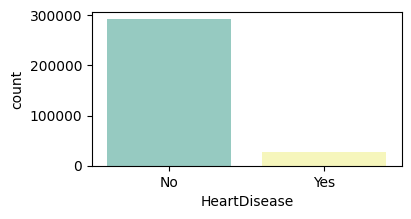

In [15]:
plt.figure(figsize=(4,2))
sns.countplot(x='HeartDisease',data=raw_diabetes_datasets,palette='Set3')
plt.show()

### 1.2.2 Univariate Analysis for numerical and categorical features

In [16]:
colorpix = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

 Univariate analysis for BMI column:
 Univariate analysis for PhysicalHealth column:
 Univariate analysis for MentalHealth column:
 Univariate analysis for SleepTime column:


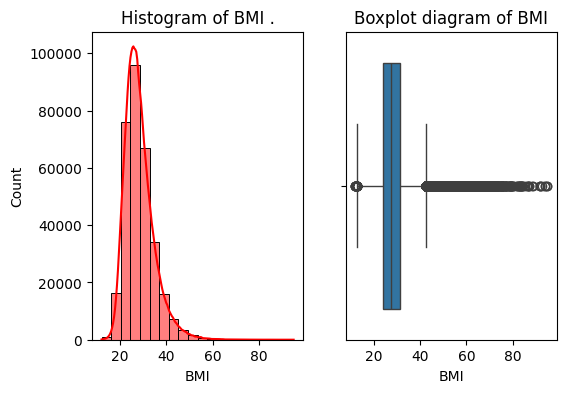

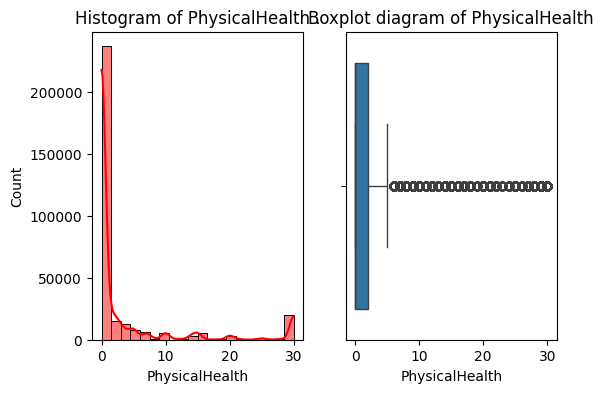

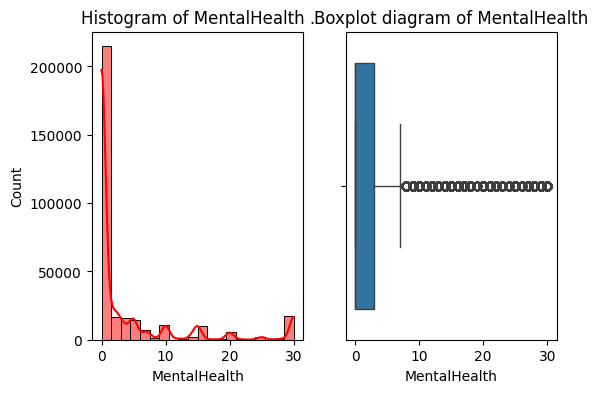

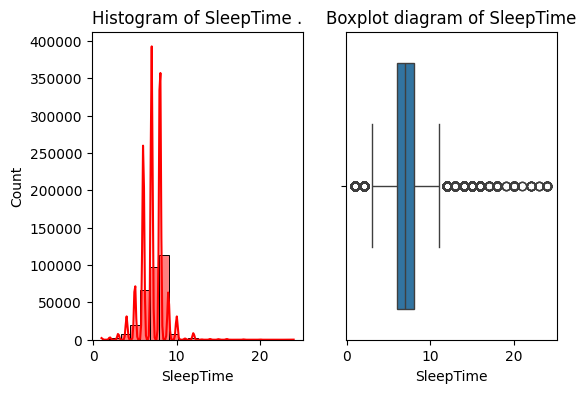

In [17]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(6,4))
    sns.histplot(raw_diabetes_datasets[col], kde=True, bins=20, color='Red',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')

    sns.boxplot(x=raw_diabetes_datasets[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')

for col in numeric_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

#### Observations:  BMI is aprroximately normaly balanced whereas PhysicalHealth and MentalHelath are right-skewed. Sleep time is also normaly balanced.

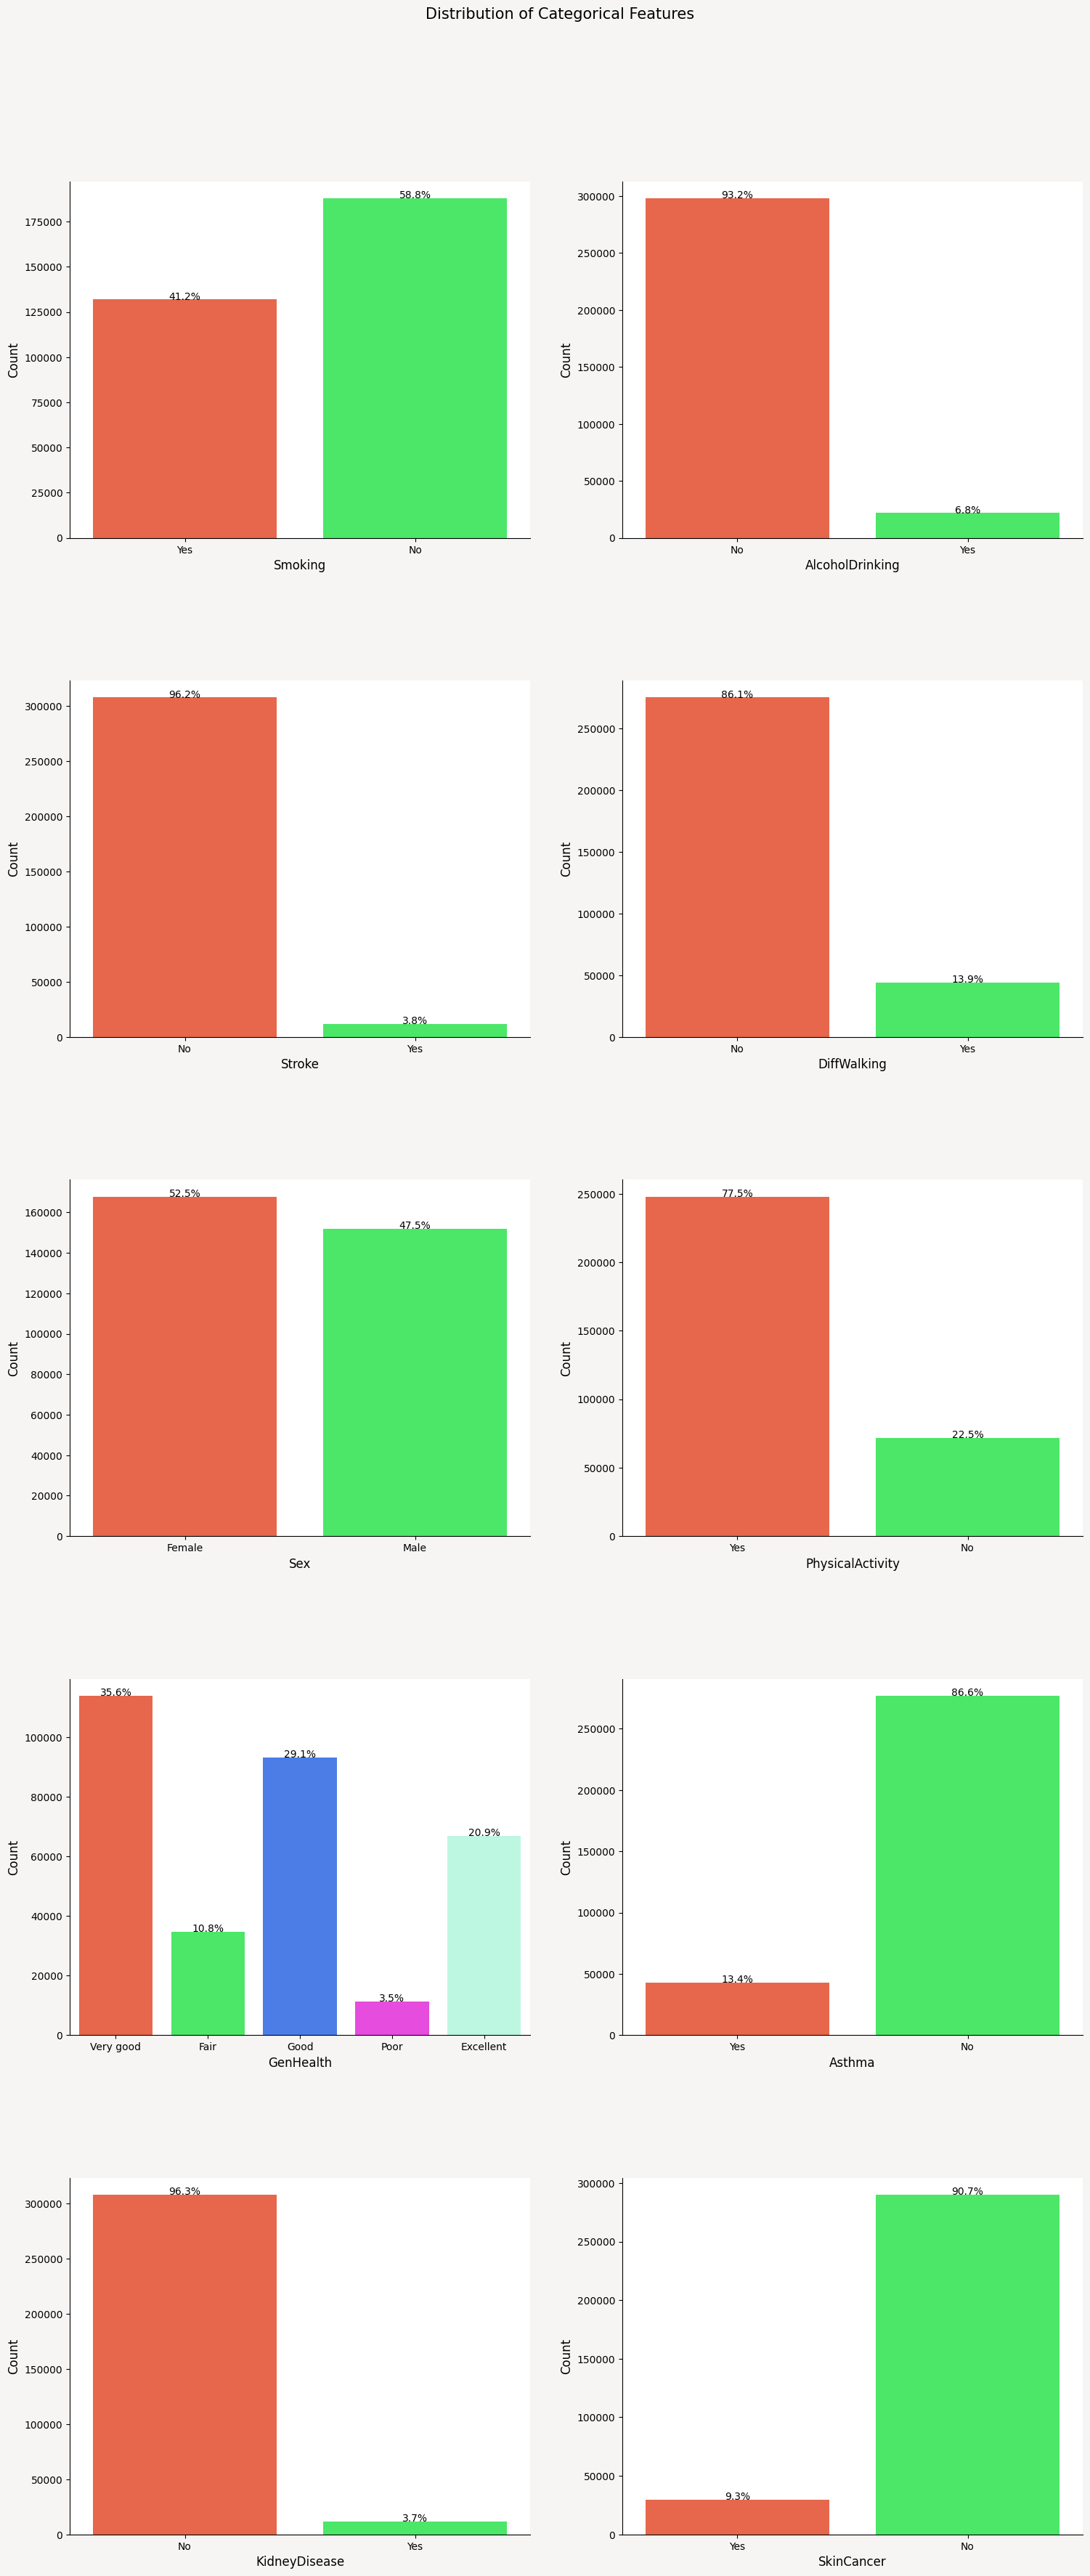

In [18]:
import warnings
warnings.filterwarnings("ignore")

cat_feats = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

i = 0
for col in cat_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=raw_diabetes_datasets, x=col, palette=colorpix, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(raw_diabetes_datasets))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()

Observation: Dataset is imbalanced i.e, the occurrence of one of the classes is very high compared to the other classes present.

We will have to tackle this otherwise the model will be bias towards predicting the class with high frequency compared to the one with low frequency.

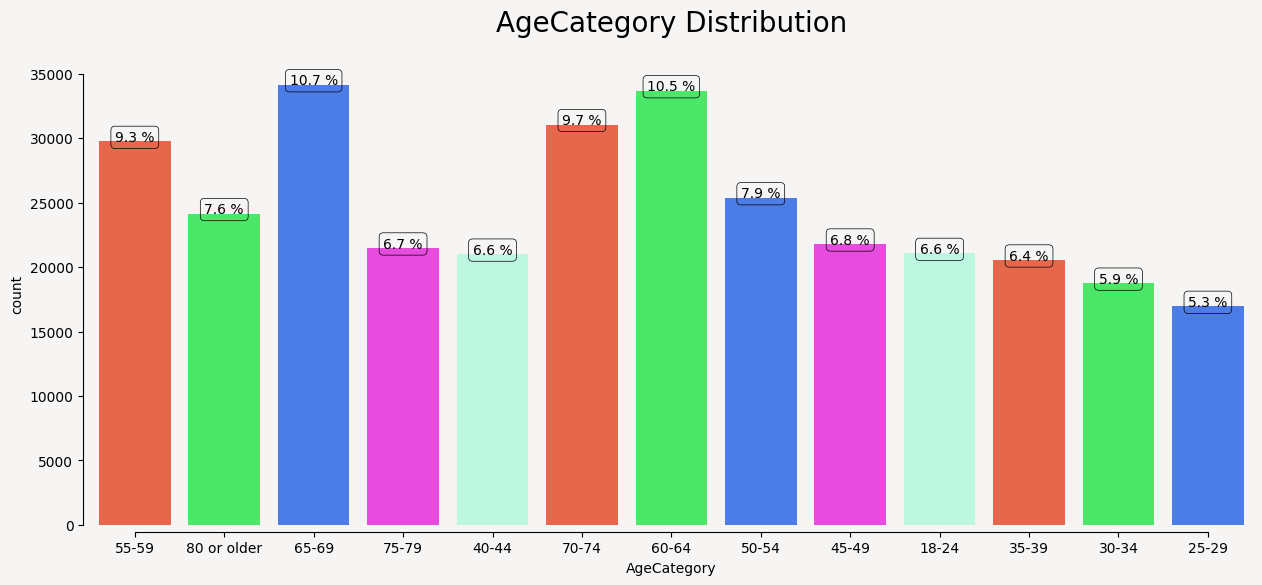

In [19]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(raw_diabetes_datasets))
ax = sns.countplot(x=raw_diabetes_datasets['AgeCategory'], palette=colorpix)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

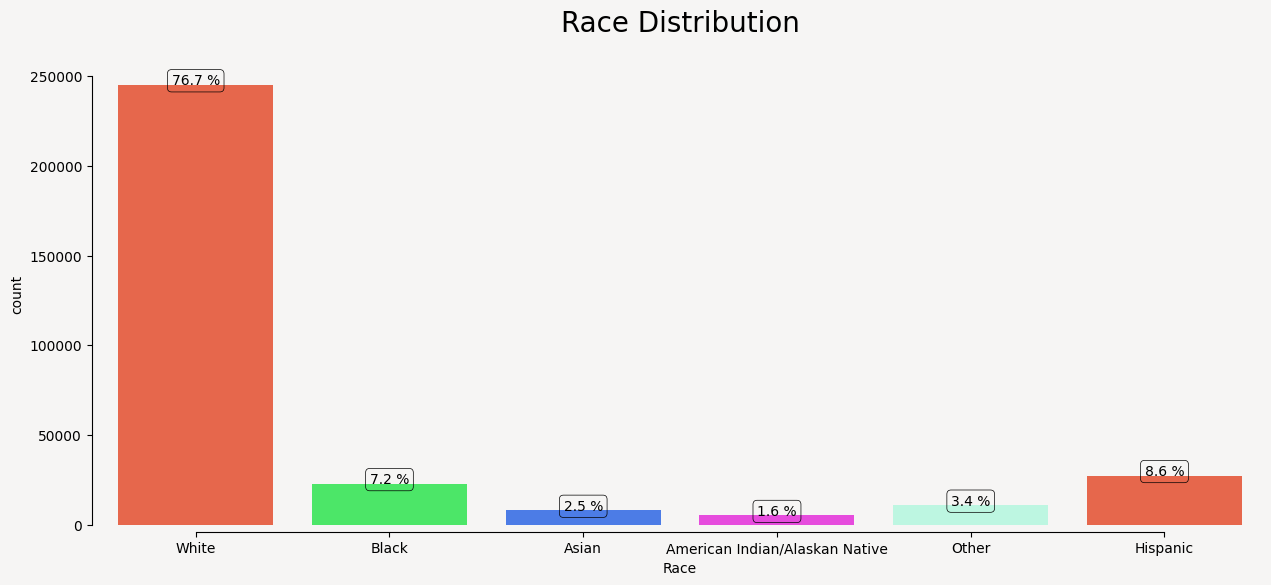

In [20]:
plt.figure(figsize=(15, 6),facecolor='#F6F5F4')
total = float(len(raw_diabetes_datasets))
ax = sns.countplot(x=raw_diabetes_datasets['Race'], palette=colorpix)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

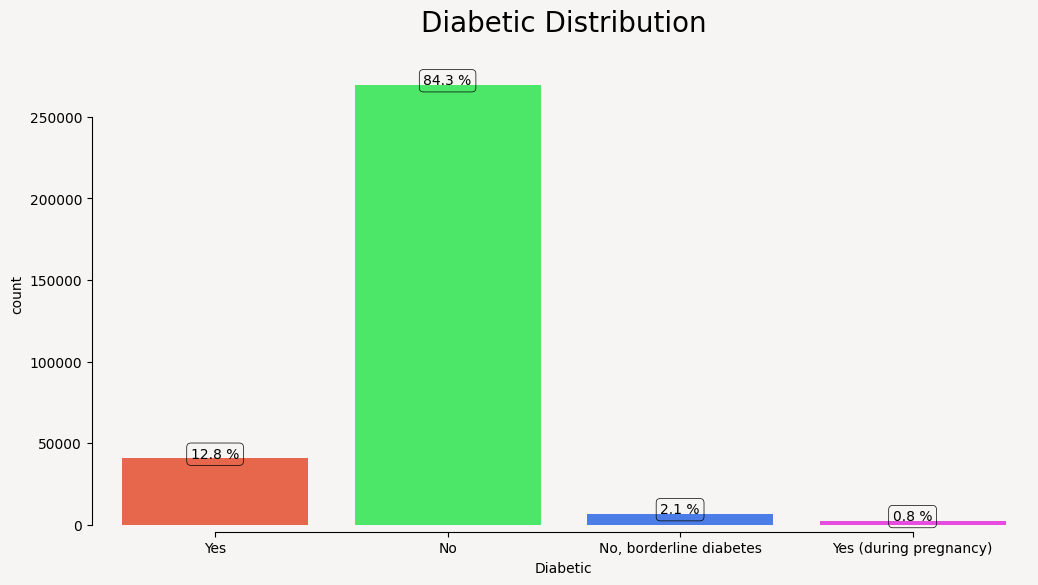

In [21]:
plt.figure(figsize=(12, 6),facecolor='#F6F5F4')
total = float(len(raw_diabetes_datasets))
ax = sns.countplot(x=raw_diabetes_datasets['Diabetic'], palette=colorpix)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

**Observation**: Imbalanced datasets can lead to a model bias towards the majority class. In this case, the model might be biased towards predicting '0' since there are more instances of '0' than '1' in the dataset.

While splitting a dataset into training and test datasets, will use the **stratify** parameter  to ensure that both sets have a similar distribution of classes as the original dataset.

### 1.2.3 Bivariate Analysis for numerical and categorical features

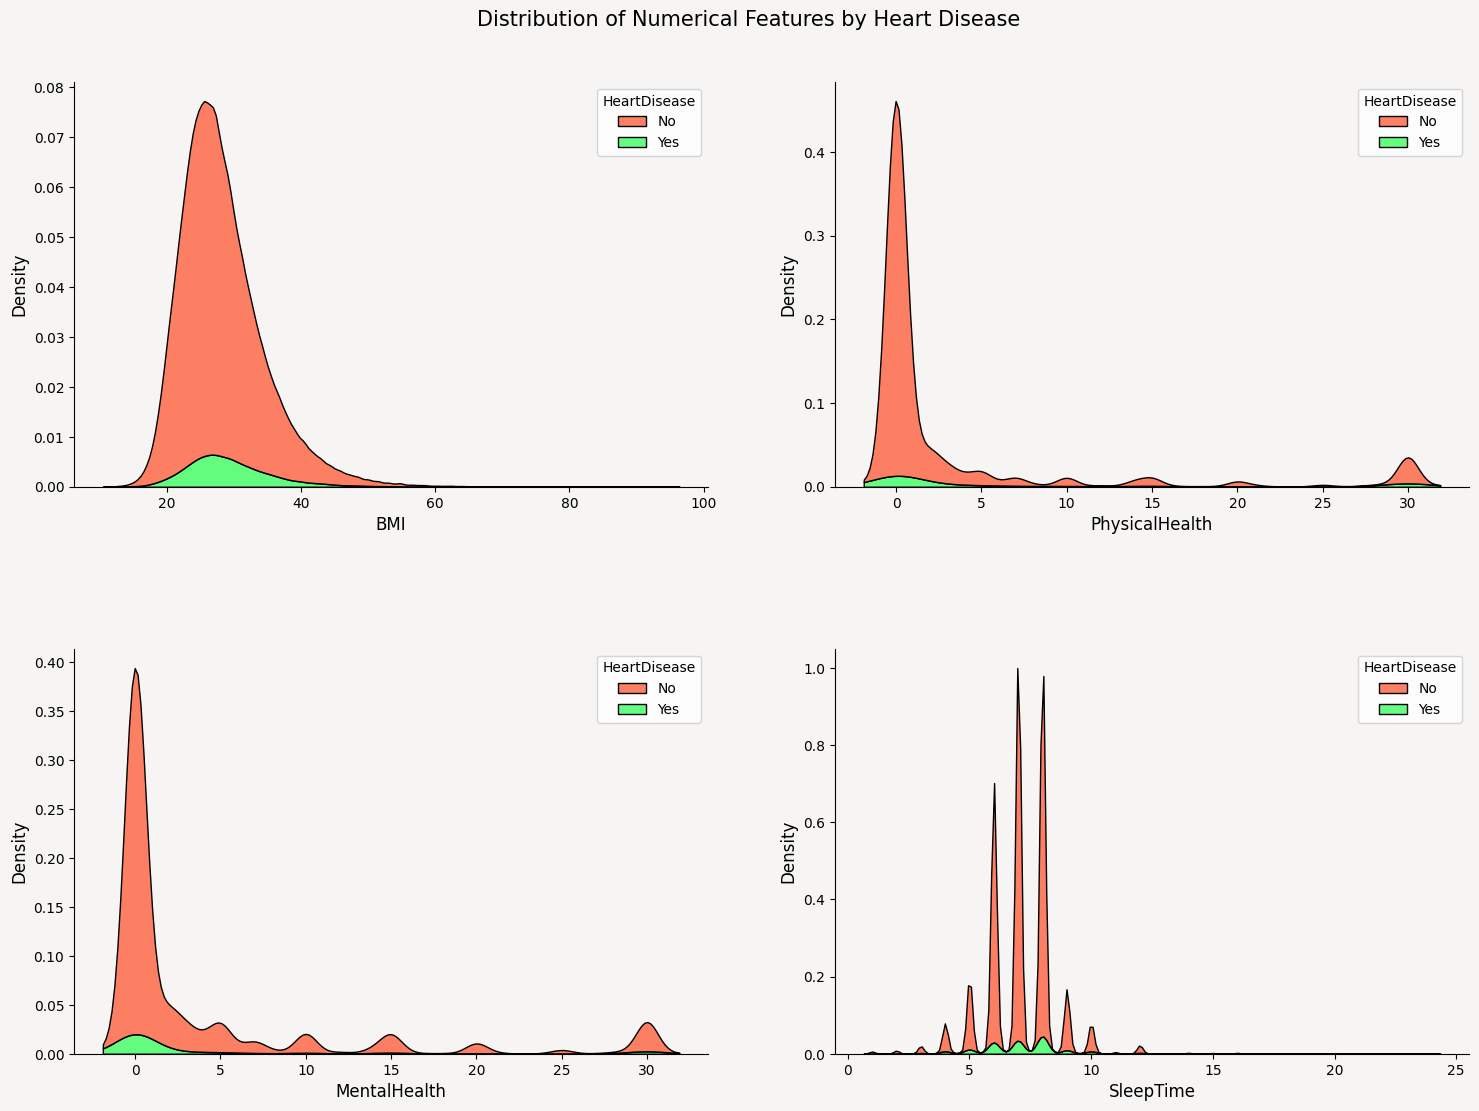

In [24]:
num_feats = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 6 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1, facecolor='#F6F5F4')

    sns.kdeplot(data=raw_diabetes_datasets, x=col, hue="HeartDisease", multiple="stack", palette=colorpix)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

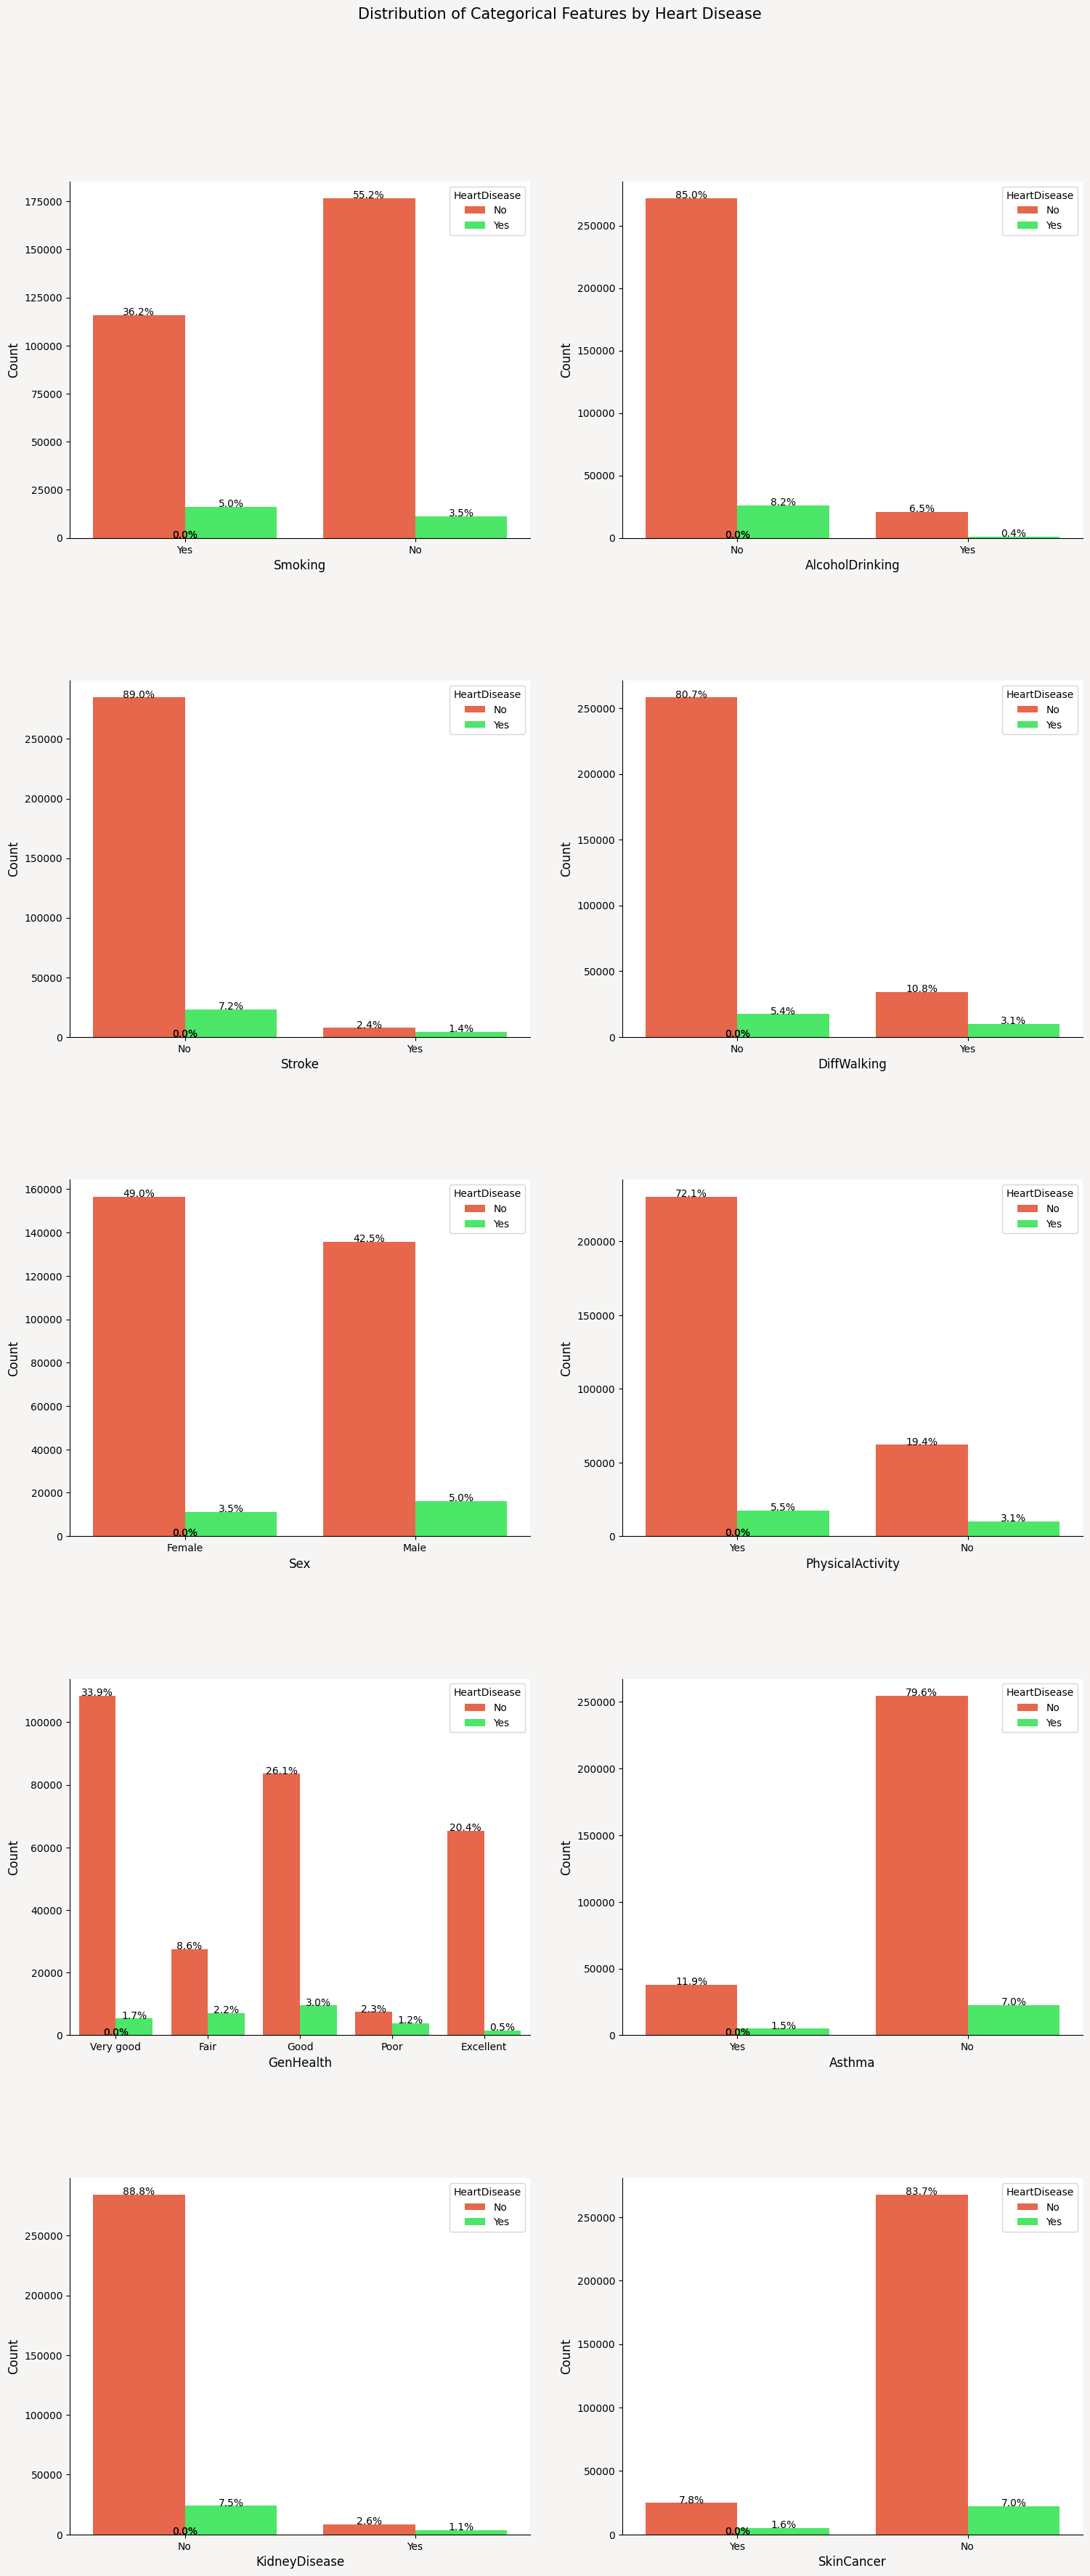

In [26]:
cat_feats = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

for i, col in enumerate(cat_feats):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=raw_diabetes_datasets, x=col, hue="HeartDisease", palette=colorpix, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(raw_diabetes_datasets))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()

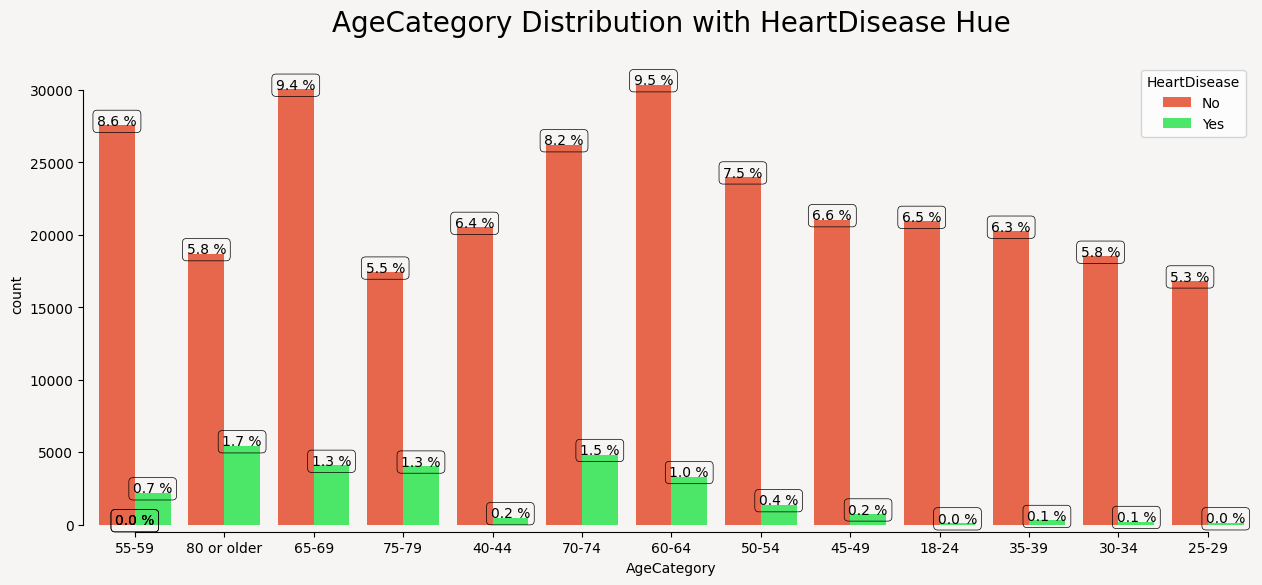

In [27]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(raw_diabetes_datasets))

ax = sns.countplot(x='AgeCategory', hue='HeartDisease', data=raw_diabetes_datasets, palette=colorpix)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution with HeartDisease Hue', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


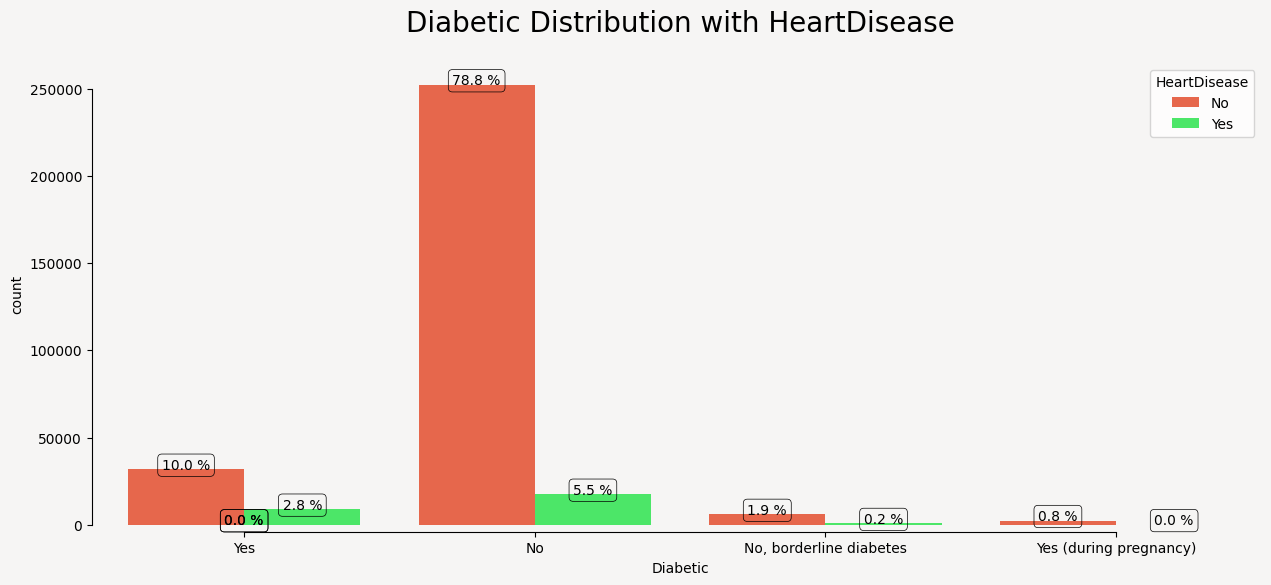

In [28]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(raw_diabetes_datasets))

ax = sns.countplot(x='Diabetic', hue='HeartDisease', data=raw_diabetes_datasets, palette=colorpix)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Diabetic Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

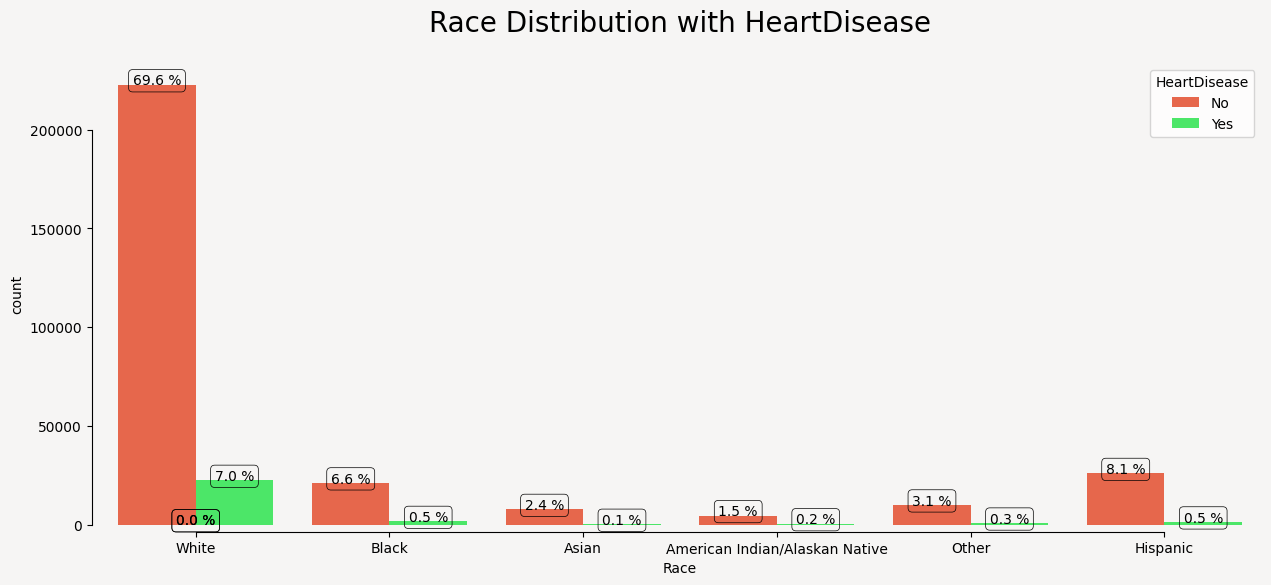

In [29]:
plt.figure(figsize=(15, 6), facecolor='#F6F5F4')
total = float(len(raw_diabetes_datasets))

ax = sns.countplot(x='Race', hue='HeartDisease', data=raw_diabetes_datasets, palette=colorpix)
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

### 1.3 Feature Engineering

### 1.3.1 Convert Categorical to Integers

In [30]:
dataset_copy = raw_diabetes_datasets.copy()

#### 1.3.1 a Here replacing all columns with Yes or No to 1 and 0

In [31]:
dataset_copy = dataset_copy.replace("Yes", "1")
dataset_copy = dataset_copy.replace("No", "0")
dataset_copy.describe(include='all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top               0            NaN       0               0       0   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN           0  Female       65-69   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity  GenHealth      SleepTime  Asthma  \
count    319795           319795     319795  319795.000000  319795   
unique        4                2          5            NaN       2   
top           0                1  Very good            NaN       0   
freq     269653           247957     113858            NaN  276923   
mean        NaN              NaN        NaN       7.097075     NaN   
std         NaN              NaN        NaN       1.436007     NaN   
min         NaN              NaN        NaN       1.000000     NaN   
25%         NaN              NaN        NaN       6.000000     NaN   
50%         NaN              NaN        NaN       7.000000     NaN   
75%         NaN              NaN        NaN       8.000000     NaN   
max         NaN              NaN        NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top                0          0  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

#### 1.3.1 b Convert remaining categorical columns one by one

In [32]:
# Column Distinct Values of a Race:  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other''Hispanic']
# Distinct Values of a Diabetic:  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
# Distinct Values of a GenHealth:  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
dataset_copy['Diabetic'] = dataset_copy['Diabetic'].replace('No, borderline diabetes', "3")
dataset_copy['Diabetic'] = dataset_copy['Diabetic'].replace('Yes (during pregnancy)', "4")

dataset_copy['GenHealth']=dataset_copy['GenHealth'].replace('Poor',"0")
dataset_copy['GenHealth']=dataset_copy['GenHealth'].replace('Fair',"1")
dataset_copy['GenHealth']=dataset_copy['GenHealth'].replace('Good',"2")
dataset_copy['GenHealth']=dataset_copy['GenHealth'].replace('Very good',"3")
dataset_copy['GenHealth']=dataset_copy['GenHealth'].replace('Excellent',"4")


dataset_copy = dataset_copy.replace('Female',"0")
dataset_copy = dataset_copy.replace('Male',"1")


In [33]:
dataset_copy['AgeCategory'] = dataset_copy['AgeCategory'].str[:2]
# print(dataset_copy['AgeCategory'])

In [34]:
dataset_copy.describe(include='all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top               0            NaN       0               0       0   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN           0       0          65   White   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity GenHealth      SleepTime  Asthma  \
count    319795           319795    319795  319795.000000  319795   
unique        4                2         5            NaN       2   
top           0                1         3            NaN       0   
freq     269653           247957    113858            NaN  276923   
mean        NaN              NaN       NaN       7.097075     NaN   
std         NaN              NaN       NaN       1.436007     NaN   
min         NaN              NaN       NaN       1.000000     NaN   
25%         NaN              NaN       NaN       6.000000     NaN   
50%         NaN              NaN       NaN       7.000000     NaN   
75%         NaN              NaN       NaN       8.000000     NaN   
max         NaN              NaN       NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top                0          0  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

In [35]:
dataset_copy.groupby("HeartDisease").count()

BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
HeartDisease                                                             
0             292422   292422           292422  292422          292422   
1              27373    27373            27373   27373           27373   

              MentalHealth  DiffWalking     Sex  AgeCategory    Race  \
HeartDisease                                                           
0                   292422       292422  292422       292422  292422   
1                    27373        27373   27373        27373   27373   

              Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
HeartDisease                                                             
0               292422            292422     292422     292422  292422   
1                27373             27373      27373      27373   27373   

              KidneyDisease  SkinCancer  
HeartDisease                             
0                    292422      292422  
1                     27373       27373

In [36]:
dataset_copy['Race']=dataset_copy['Race'].replace('White',"0")
dataset_copy['Race']=dataset_copy['Race'].replace('Black',"1")
dataset_copy['Race']=dataset_copy['Race'].replace('Asian',"2")
dataset_copy['Race']=dataset_copy['Race'].replace('American Indian/Alaskan Native',"3")
dataset_copy['Race']=dataset_copy['Race'].replace('Other',"4")
dataset_copy['Race']=dataset_copy['Race'].replace('Hispanic',"5")

In [37]:
# nan_columns_list = ['HeartDisease','Smoking', 'Stroke', 'AlcoholDrinking', 'DiffWalking' , 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
nan_columns_list =['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
distinct_list =  [print(f"Distinct Values of a {column}:  {dataset_copy[column].unique()}") for column in nan_columns_list]

Distinct Values of a BMI:  [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Distinct Values of a PhysicalHealth:  [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
Distinct Values of a MentalHealth:  [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
Distinct Values of a SleepTime:  [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]


In [38]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 1.3.3 Check for Multicollinearity in the features

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset_copy' is your dataframe and it's already loaded.
# Create a copy to avoid changing the original dataframe
encoded_dataset = raw_diabetes_datasets.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical (object type) column
for column in encoded_dataset.select_dtypes(include=['object']).columns:
    encoded_dataset[column] = label_encoder.fit_transform(encoded_dataset[column])

# Now encoded_dataset has all string columns converted to integer labels
print(encoded_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [41]:
encoded_dataset

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0    0            7     5         2   
1                0.0            0    0           12     5         0   
2               30.0            0    1            9     5         2   
3                0.0            0    0           11     5         0   
4                0.0            1    0            4     5         0   
...              ...          ...  ...          ...   ...       ...   
319790           0.0            1    1            8     3         2   
319791           0.0            0    1            3     3         0   
319792           0.0            0    0            5     3         0   
319793           0.0            0    0            1     3         0   
319794           0.0            0    0           12     3         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          4        5.0       1              0   
1                      1          4        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          4        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1        6.0       1              0   
319791                 1          4        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[319795 rows x 18 columns]

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = encoded_dataset.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(encoded_dataset.values, i) for i in range(len(encoded_dataset.columns))]

print(vif_data)

             feature        VIF
0       HeartDisease   1.257432
1                BMI  15.210559
2            Smoking   1.823454
3    AlcoholDrinking   1.100421
4             Stroke   1.116905
5     PhysicalHealth   1.599487
6       MentalHealth   1.438003
7        DiffWalking   1.637004
8                Sex   1.978236
9        AgeCategory   5.688295
10              Race  12.982119
11          Diabetic   1.338435
12  PhysicalActivity   4.595669
13         GenHealth   3.087401
14         SleepTime  16.772639
15            Asthma   1.202385
16     KidneyDisease   1.101811
17        SkinCancer   1.198668


Observation: BMI, GenHealth and SleepTime are highly collinear

### 1.3.4 Correlation Matrix

In [43]:
def show_heatmap(df):

    correlation_matrix = df.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()


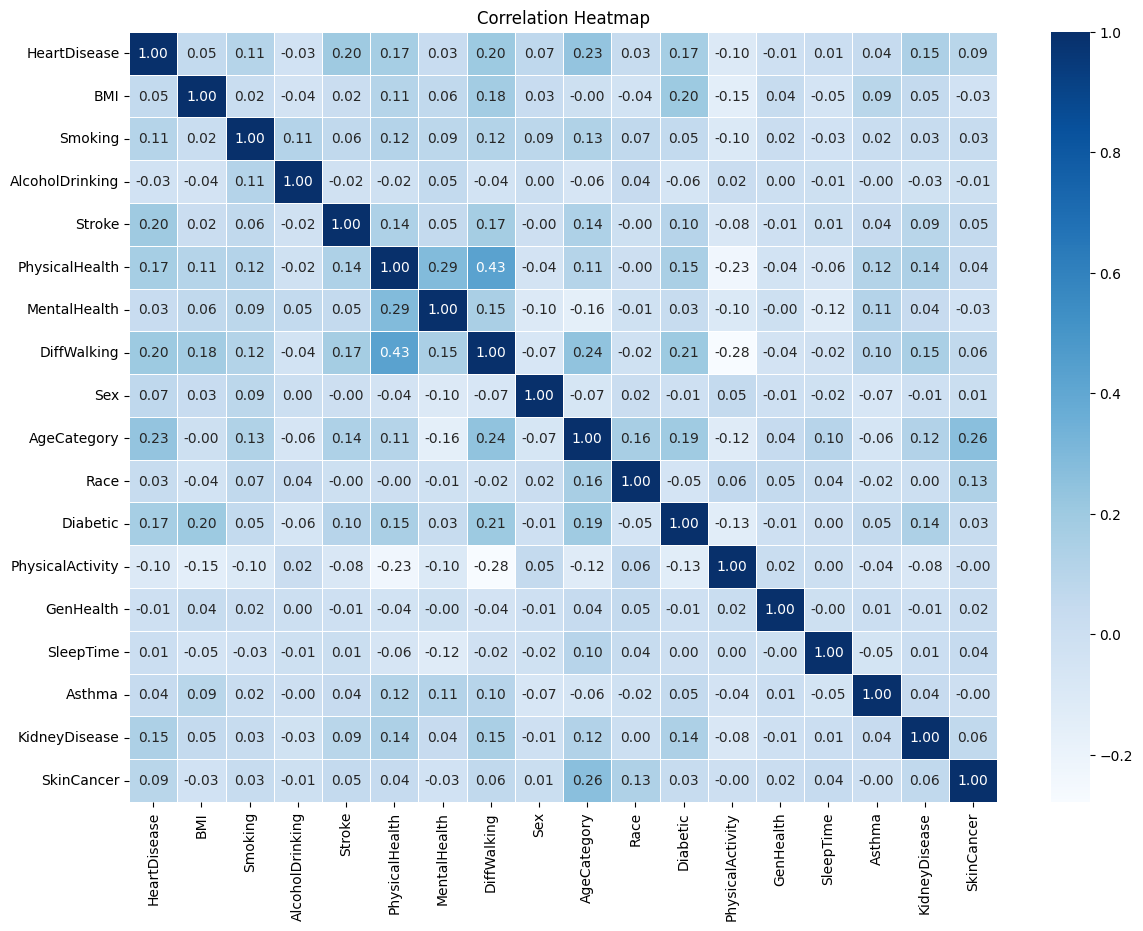

In [44]:
show_heatmap(encoded_dataset)

length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>
length of ax lines is  <Axes.ArtistList of 2 lines>


<Figure size 640x480 with 0 Axes>

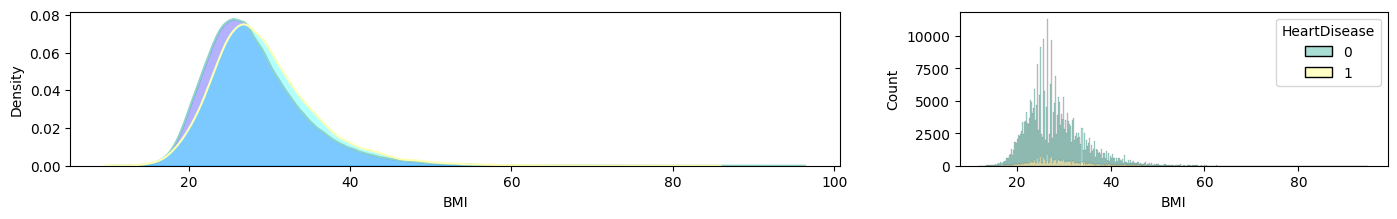

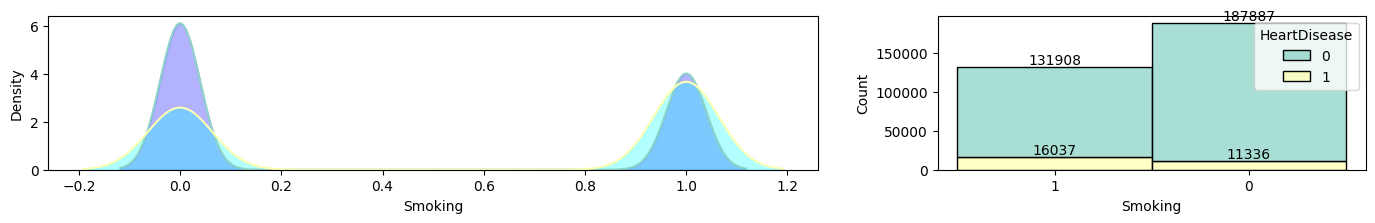

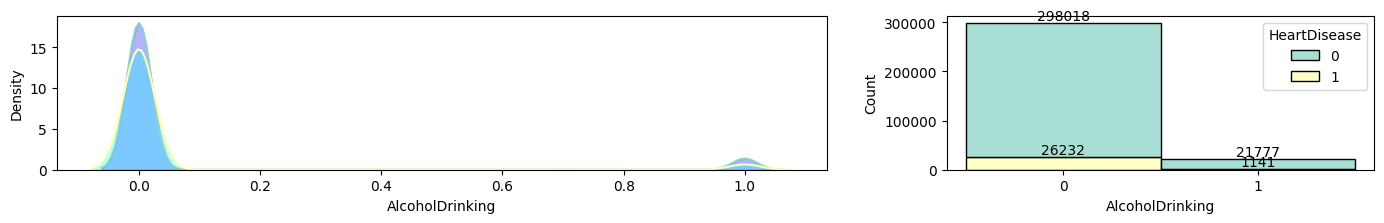

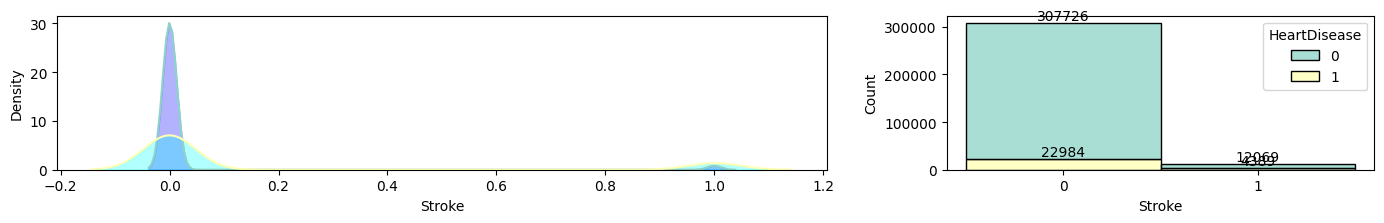

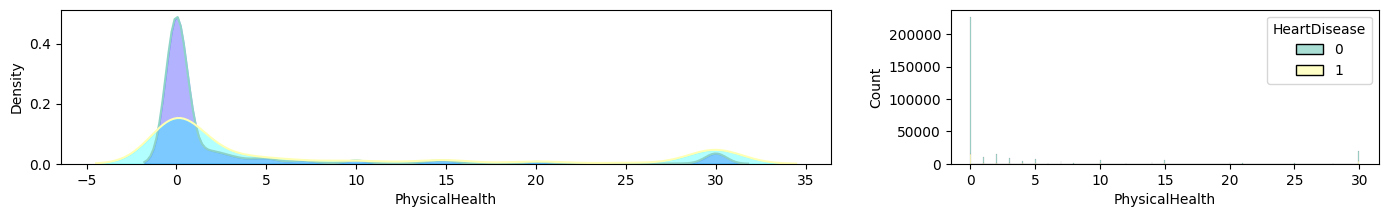

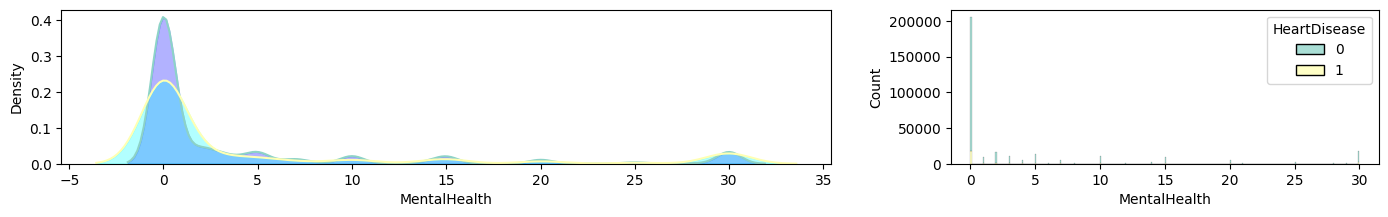

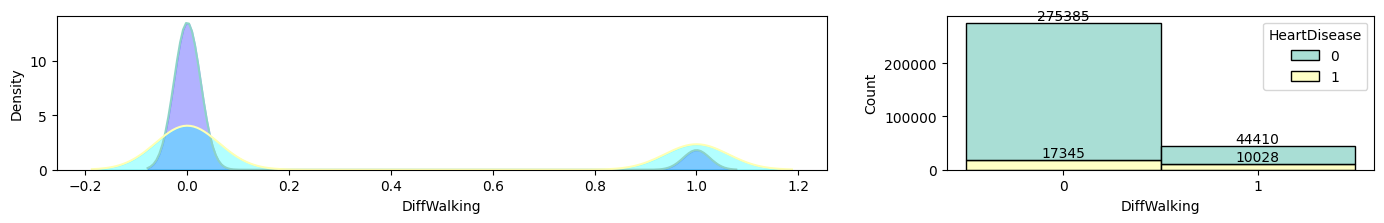

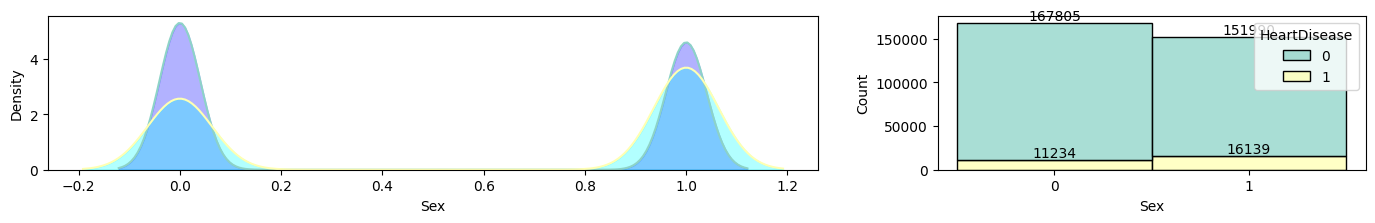

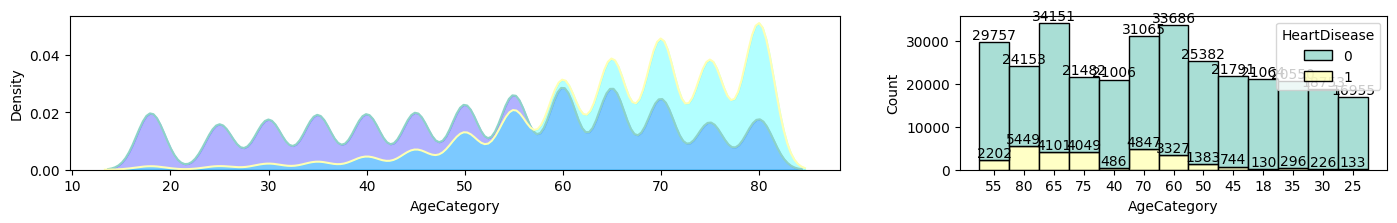

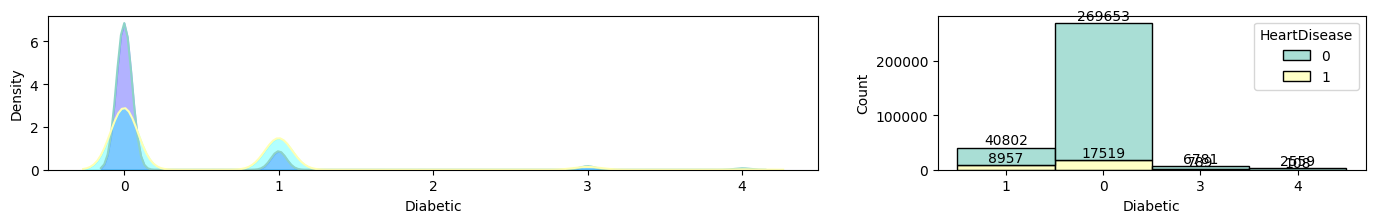

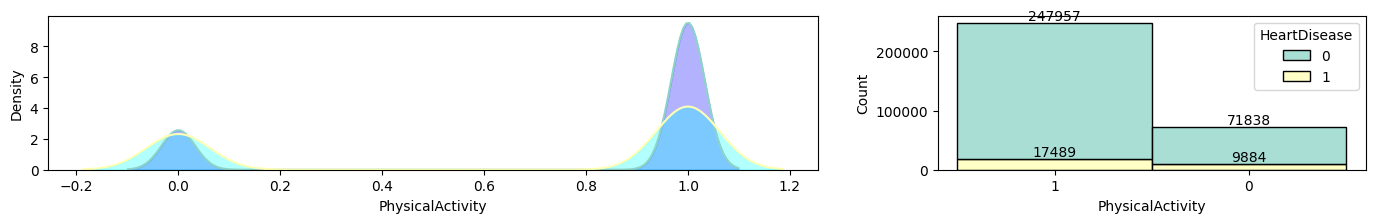

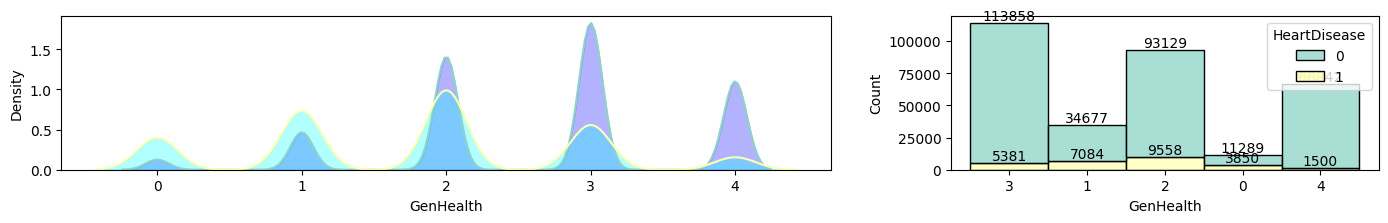

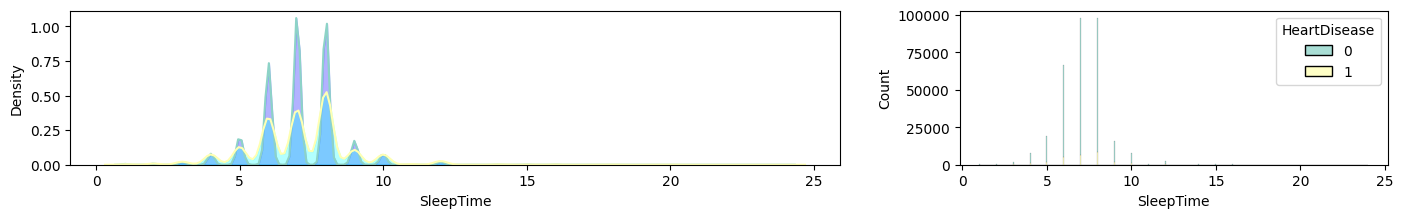

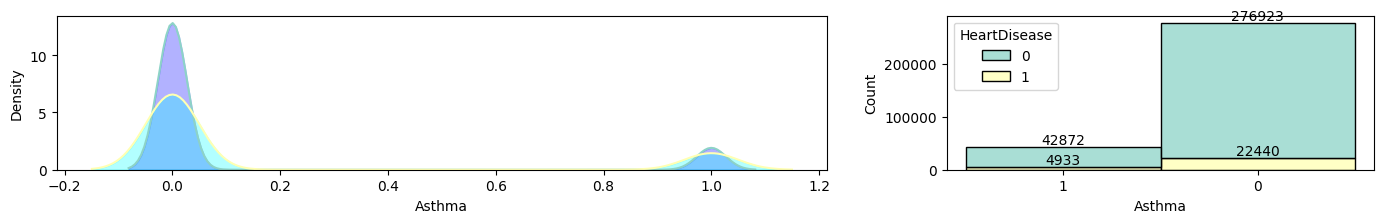

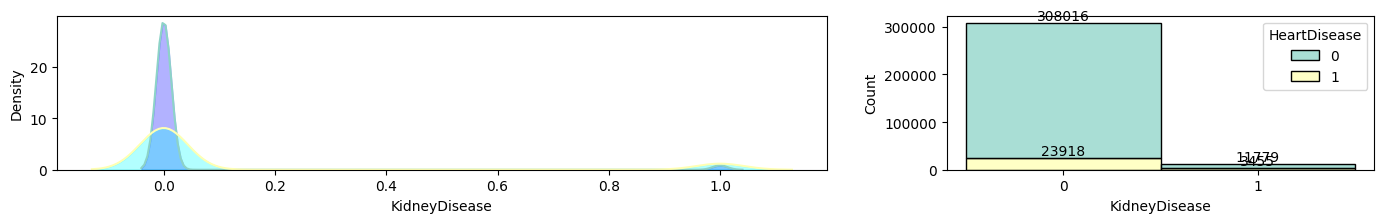

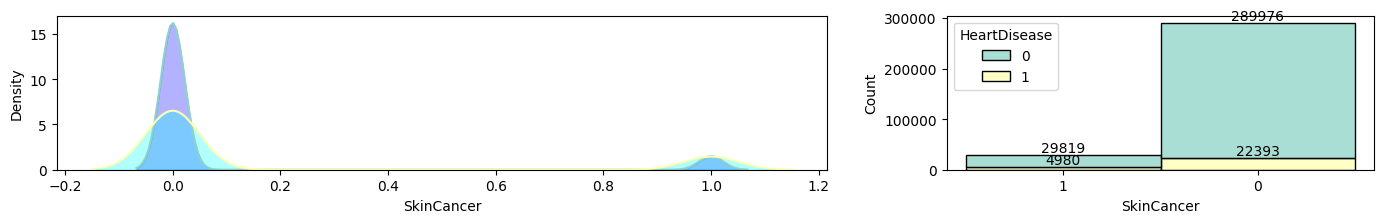

In [ ]:
import warnings
warnings.filterwarnings("ignore")

CustomPalette = sns.set_palette(sns.color_palette('Set3'))

dfcolumns=[ 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

plt.subplots_adjust(left=0.3, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.3)

for i, col1 in enumerate(dfcolumns):
    if col1=="Race":
        continue
    else:
        fig , axes= plt.subplots(1,2, figsize=(17,2),gridspec_kw={'width_ratios': [2.25, 1.25]})

        ax=plt.subplot(1,2,1 )
        ax0=sns.distplot(dataset_copy[col1][dataset_copy['HeartDisease']=="0"],hist=False, kde=True, label='HeartDisease = No' )
        ax1=sns.distplot(dataset_copy[col1][dataset_copy['HeartDisease']=="1"],hist=False, kde=True , ax=ax0, label='HeartDisease= Yes')



        # Get the two lines from the axes to generate shading
        print(f"length of ax lines is  {ax.lines}")
        l1 = ax.lines[0]
        l2 = ax.lines[1]

        # Get the xy data from the lines so that we can shade
        x1 = l1.get_xydata()[:,0]
        y1 = l1.get_xydata()[:,1]
        x2 = l2.get_xydata()[:,0]
        y2 = l2.get_xydata()[:,1]
        ax.fill_between(x1,y1, color="blue", alpha=0.3)
        ax.fill_between(x2,y2, color="aqua", alpha=0.3)


        ax=plt.subplot(1,2,2)
        ax2=sns.histplot(data=dataset_copy, x=dataset_copy[col1], hue=dataset_copy['HeartDisease'], multiple="stack")
        for container in ax.containers:
            if col1=="BMI":
                continue
            elif col1== "PhysicalHealth":
                continue
            elif col1== "MentalHealth":
                continue
            elif col1== "SleepTime":
                continue
            else:
                ax.bar_label(container)



plt.show()

Observation:

1) People who drink and have HeartDisease is quite small in number.

2) People who got stroke  and have HeartDisease is again very small.

3) People who have diabetes and have HeartDisease is also small.

4) People who have Asthma, KidneyDisease and skincancer and have HeartDisease again low in number.
5)

### 1.4 Data Preprocessing

#### 1.4.1 Tackling Imbalanced datasets
https://imbalanced-learn.org/stable/user_guide.html#user-guide

In [ ]:
# pip install imbalanced-learn

In [45]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.base import clone

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#model
from sklearn.experimental import enable_halving_search_cv
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import (cross_validate, StratifiedKFold, train_test_split,GridSearchCV,
                                    HalvingGridSearchCV)

In [50]:
reduced_df=dataset_copy.copy()

In [51]:
reduced_df.describe(include='all')

HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top               0            NaN       0               0       0   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795   
unique             NaN            NaN           2       2          13       6   
top                NaN            NaN           0       0          65       0   
freq               NaN            NaN      275385  167805       34151  245212   
mean           3.37171       3.898366         NaN     NaN         NaN     NaN   
std            7.95085       7.955235         NaN     NaN         NaN     NaN   
min            0.00000       0.000000         NaN     NaN         NaN     NaN   
25%            0.00000       0.000000         NaN     NaN         NaN     NaN   
50%            0.00000       0.000000         NaN     NaN         NaN     NaN   
75%            2.00000       3.000000         NaN     NaN         NaN     NaN   
max           30.00000      30.000000         NaN     NaN         NaN     NaN   

       Diabetic PhysicalActivity GenHealth      SleepTime  Asthma  \
count    319795           319795    319795  319795.000000  319795   
unique        4                2         5            NaN       2   
top           0                1         3            NaN       0   
freq     269653           247957    113858            NaN  276923   
mean        NaN              NaN       NaN       7.097075     NaN   
std         NaN              NaN       NaN       1.436007     NaN   
min         NaN              NaN       NaN       1.000000     NaN   
25%         NaN              NaN       NaN       6.000000     NaN   
50%         NaN              NaN       NaN       7.000000     NaN   
75%         NaN              NaN       NaN       8.000000     NaN   
max         NaN              NaN       NaN      24.000000     NaN   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top                0          0  
freq          308016     289976  
mean             NaN        NaN  
std              NaN        NaN  
min              NaN        NaN  
25%              NaN        NaN  
50%              NaN        NaN  
75%              NaN        NaN  
max              NaN        NaN

In [ ]:
# # Assuming df1 is your original dataframe
# df2 = reduced_df.sample(n=1000000, random_state=1, replace=True) # random_state ensures reproducibility

#### Dataset reduction as 3M is failing for memory issues

In [56]:
# Filter out the two groups
# Split the data into positive and negative groups
heart_disease_positive = reduced_df[reduced_df['HeartDisease'] == '1'] # If using encoded_dataset, replace '1' to 1 (without quotes)
heart_disease_negative = reduced_df[reduced_df['HeartDisease'] == '0']

In [57]:
print(len(heart_disease_positive))
print(len(heart_disease_negative))

27373
292422


In [64]:
# Randomly sample records for the training set
positive_train_sample = heart_disease_positive.sample(n=7000, random_state=42)
negative_train_sample = heart_disease_negative.sample(n=53000, random_state=42)

# Combine samples to form the training DataFrame
train_df = pd.concat([positive_train_sample, negative_train_sample])

# Remove the training samples from the original datasets to avoid overlap
remaining_positive = heart_disease_positive.drop(positive_train_sample.index)
remaining_negative = heart_disease_negative.drop(negative_train_sample.index)

# print(remaining_positive.count())

# From the remaining, sample 53,000 positive and 7,000 negative records for the validation dataset
positive_validation = remaining_positive.sample(n=7000, random_state=42)
negative_validation = remaining_negative.sample(n=53000, random_state=42)

# Combine the remaining records (for validation and test sets)
remaining_df = pd.concat([positive_validation, negative_validation])

# # Combine to form the validation dataset
# validation_df = pd.concat([positive_validation, negative_validation]).sample(frac=1, random_state=42).reset_index(drop=True) Use this as test dataset later on and change the no to smaller than train above like 23000 +7000

# Now, split the remaining data into validation and test sets
# Adjust the test_size according to your needs, here it's set to 0.5 to equally split the remaining data
validation_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=42)

# Shuffle the DataFrames (optional, as train_test_split shuffles by default)
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
validation_df = validation_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Count of train_df: {len(train_df)}")
print(f"Count of validation_df: {len(validation_df)}")
print(f"Count of test_df: {len(test_df)}")

# datasets are ready
# train_df for training, validation_df for validation, and test_df for testing


Count of train_df: 60000
Count of validation_df: 30000
Count of test_df: 30000


In [54]:
# # Randomly sample 7,000 records from the positive group
# positive_sample = heart_disease_positive.sample(n=7000, random_state=42)

# # Randomly sample 43,000 records from the negative group
# negative_sample = heart_disease_negative.sample(n=43000, random_state=42)

# # Concatenate both samples to form the new DataFrame
# df3 = pd.concat([positive_sample, negative_sample])

# # Shuffle the DataFrame rows
# df3 = df3.sample(frac=1, random_state=42).reset_index(drop=True)


In [65]:
X=train_df.drop(['HeartDisease', 'Race'], axis=1)
y=train_df['HeartDisease']

In [66]:
train_df.describe()

BMI  PhysicalHealth  MentalHealth     SleepTime
count  60000.000000    60000.000000  60000.000000  60000.000000
mean      28.354155        3.511750      3.924600      7.105300
std        6.345741        8.136664      7.998269      1.464462
min       12.020000        0.000000      0.000000      1.000000
25%       24.030000        0.000000      0.000000      6.000000
50%       27.340000        0.000000      0.000000      7.000000
75%       31.470000        2.000000      3.000000      8.000000
max       94.660000       30.000000     30.000000     24.000000

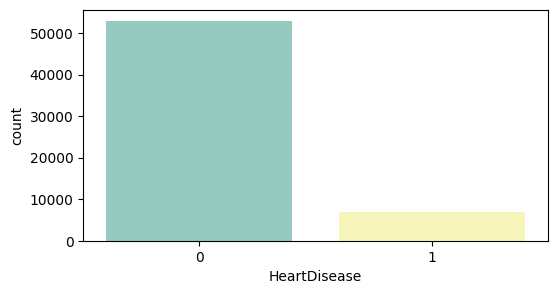

In [67]:
plt.figure(figsize=(6,3))
sns.countplot(x='HeartDisease',data=train_df,palette='Set3')
plt.show()

In [68]:
#Use "make_scorer" to convert a metric to scorer
def f1_metric(model, X_train, y_train):
        return f1_score(y_train, model.predict(X_train), average='binary')

#### 1.4.2 On discussion with Michellle, for imbalanced datasets, there are 3 ways :
A) Undersample - Bring -ve and +ve samples to equal no

B) Oversample - either duplicate or use SMOTE analyis to create new data

C) Weighted

Also in terms of matrxi since this is Madical data, accuracy is not a good measure rather False Negatives is something is to be focussed upon.

#### Function to test trained model on test_df

In [99]:
## Final test on test dataframe that test_df

def final_test(trained_model):
  # Separate features and labels in test dataset
  X_test = test_df.drop(['HeartDisease',  'Race'], axis=1)
  y_test = test_df['HeartDisease']

  # X=train_df.drop(['HeartDisease', 'Race'], axis=1)
  # y=train_df['HeartDisease']

  # Make predictions with the trained model
  y_pred = trained_model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary', pos_label='1')
  recall = recall_score(y_test, y_pred, average='binary', pos_label='1')
  f1 = f1_score(y_test, y_pred, average='binary',pos_label='1')

  return accuracy, precision, recall, f1

In [93]:
test_df.describe(include='all')

HeartDisease           BMI Smoking AlcoholDrinking Stroke  \
count         30000  30000.000000   30000           30000  30000   
unique            2           NaN       2               2      2   
top               0           NaN       0               0      0   
freq          26456           NaN   17403           27977  28762   
mean            NaN     28.420396     NaN             NaN    NaN   
std             NaN      6.467789     NaN             NaN    NaN   
min             NaN     12.210000     NaN             NaN    NaN   
25%             NaN     24.030000     NaN             NaN    NaN   
50%             NaN     27.370000     NaN             NaN    NaN   
75%             NaN     31.570000     NaN             NaN    NaN   
max             NaN     91.820000     NaN             NaN    NaN   

        PhysicalHealth  MentalHealth DiffWalking    Sex AgeCategory   Race  \
count     30000.000000  30000.000000       30000  30000       30000  30000   
unique             NaN           NaN           2      2          13      6   
top                NaN           NaN           0      0          65      0   
freq               NaN           NaN       25563  15453        3290  23110   
mean          3.551267      3.929100         NaN    NaN         NaN    NaN   
std           8.178545      8.003866         NaN    NaN         NaN    NaN   
min           0.000000      0.000000         NaN    NaN         NaN    NaN   
25%           0.000000      0.000000         NaN    NaN         NaN    NaN   
50%           0.000000      0.000000         NaN    NaN         NaN    NaN   
75%           2.000000      3.000000         NaN    NaN         NaN    NaN   
max          30.000000     30.000000         NaN    NaN         NaN    NaN   

       Diabetic PhysicalActivity GenHealth     SleepTime Asthma KidneyDisease  \
count     30000            30000     30000  30000.000000  30000         30000   
unique        4                2         5           NaN      2             2   
top           0                1         3           NaN      0             0   
freq      25121            23056     10372           NaN  25926         28803   
mean        NaN              NaN       NaN      7.100967    NaN           NaN   
std         NaN              NaN       NaN      1.457959    NaN           NaN   
min         NaN              NaN       NaN      1.000000    NaN           NaN   
25%         NaN              NaN       NaN      6.000000    NaN           NaN   
50%         NaN              NaN       NaN      7.000000    NaN           NaN   
75%         NaN              NaN       NaN      8.000000    NaN           NaN   
max         NaN              NaN       NaN     24.000000    NaN           NaN   

       SkinCancer  
count       30000  
unique          2  
top             0  
freq        27102  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      30000 non-null  object 
 1   BMI               30000 non-null  float64
 2   Smoking           30000 non-null  object 
 3   AlcoholDrinking   30000 non-null  object 
 4   Stroke            30000 non-null  object 
 5   PhysicalHealth    30000 non-null  float64
 6   MentalHealth      30000 non-null  float64
 7   DiffWalking       30000 non-null  object 
 8   Sex               30000 non-null  object 
 9   AgeCategory       30000 non-null  object 
 10  Race              30000 non-null  object 
 11  Diabetic          30000 non-null  object 
 12  PhysicalActivity  30000 non-null  object 
 13  GenHealth         30000 non-null  object 
 14  SleepTime         30000 non-null  float64
 15  Asthma            30000 non-null  object 
 16  KidneyDisease     30000 non-null  object

In [95]:
nan_columns_list = ['HeartDisease','Smoking', 'Stroke', 'AlcoholDrinking', 'DiffWalking' , 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
distinct_list =  [print(f"Distinct Values of a {column}:  {test_df[column].unique()}") for column in nan_columns_list]

Distinct Values of a HeartDisease:  ['0' '1']
Distinct Values of a Smoking:  ['0' '1']
Distinct Values of a Stroke:  ['0' '1']
Distinct Values of a AlcoholDrinking:  ['0' '1']
Distinct Values of a DiffWalking:  ['0' '1']
Distinct Values of a Sex:  ['0' '1']
Distinct Values of a AgeCategory:  ['55' '60' '50' '65' '80' '70' '30' '18' '40' '35' '45' '75' '25']
Distinct Values of a Race:  ['0' '4' '5' '3' '1' '2']
Distinct Values of a Diabetic:  ['0' '1' '3' '4']
Distinct Values of a PhysicalActivity:  ['0' '1']
Distinct Values of a GenHealth:  ['4' '1' '2' '0' '3']
Distinct Values of a Asthma:  ['0' '1']
Distinct Values of a KidneyDisease:  ['0' '1']
Distinct Values of a SkinCancer:  ['0' '1']


##### 1.4.2 a Oversampling using scikit RandomOverSampler

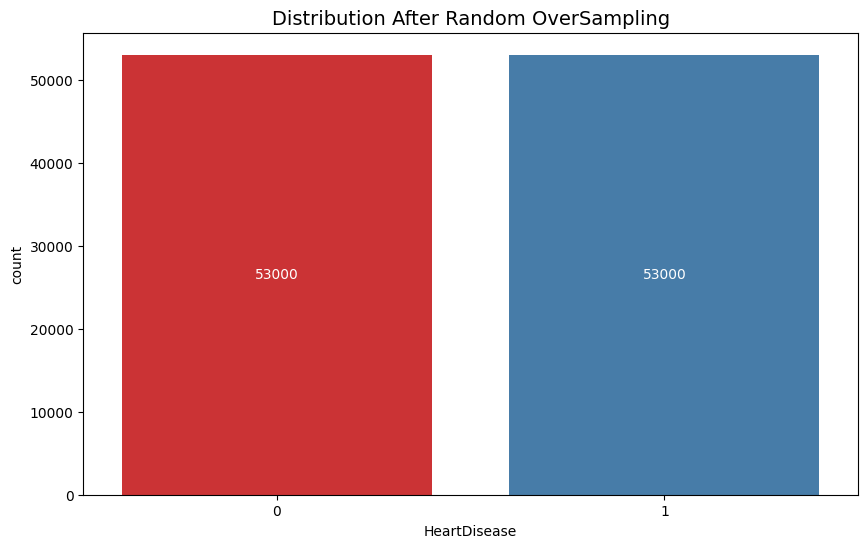

In [85]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
#oversample = RandomOverSampler(sampling_strategy=0.5)

X_ROS, y_ROS = oversample.fit_resample(X, y)

plt.figure(figsize = (10,6))
ax=sns.countplot( x = y_ROS , palette="Set1")
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Distribution After Random OverSampling", size=14)
plt.show()

In [86]:
# tuned hpyerparameters :(best parameters)  {'C': 3.593813663804626, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
# f1 score : nan

#model
X_train , X_test, y_train,  y_test = train_test_split(X_ROS, y_ROS, test_size=0.35, random_state=42)

# scaler= StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="sag", penalty="l2", C=3.593813663804626, max_iter=1000)
logreg_s.fit(X_train,y_train)
y_pred_log=logreg_s.predict(X_test)

# y_pred_proba_log = logreg_s.predict_proba(X_test)
# fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
# auc_log = round(metrics.auc(fpr_log, tpr_log),5)


ROS_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                              precision_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              recall_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              f1_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              # roc_auc_score(y_test, y_pred_proba_log[:,1])
                              ],
                              index=['Accuracy','Precision','Recall','F1-score'],
                              columns = ["Logestic_regression_ROS"]
                       )

ROS_log

Logestic_regression_ROS
Accuracy                  0.765445
Precision                 0.753895
Recall                    0.785552
F1-score                  0.769398

In [92]:
train_df.describe(include='all')

HeartDisease           BMI Smoking AlcoholDrinking Stroke  \
count         60000  60000.000000   60000           60000  60000   
unique            2           NaN       2               2      2   
top               0           NaN       0               0      0   
freq          53000           NaN   34894           56004  57503   
mean            NaN     28.354155     NaN             NaN    NaN   
std             NaN      6.345741     NaN             NaN    NaN   
min             NaN     12.020000     NaN             NaN    NaN   
25%             NaN     24.030000     NaN             NaN    NaN   
50%             NaN     27.340000     NaN             NaN    NaN   
75%             NaN     31.470000     NaN             NaN    NaN   
max             NaN     94.660000     NaN             NaN    NaN   

        PhysicalHealth  MentalHealth DiffWalking    Sex AgeCategory   Race  \
count     60000.000000  60000.000000       60000  60000       60000  60000   
unique             NaN           NaN           2      2          13      6   
top                NaN           NaN           0      0          65      0   
freq               NaN           NaN       51169  31451        6512  46293   
mean          3.511750      3.924600         NaN    NaN         NaN    NaN   
std           8.136664      7.998269         NaN    NaN         NaN    NaN   
min           0.000000      0.000000         NaN    NaN         NaN    NaN   
25%           0.000000      0.000000         NaN    NaN         NaN    NaN   
50%           0.000000      0.000000         NaN    NaN         NaN    NaN   
75%           2.000000      3.000000         NaN    NaN         NaN    NaN   
max          30.000000     30.000000         NaN    NaN         NaN    NaN   

       Diabetic PhysicalActivity GenHealth     SleepTime Asthma KidneyDisease  \
count     60000            60000     60000  60000.000000  60000         60000   
unique        4                2         5           NaN      2             2   
top           0                1         3           NaN      0             0   
freq      50166            46194     21165           NaN  51909         57563   
mean        NaN              NaN       NaN      7.105300    NaN           NaN   
std         NaN              NaN       NaN      1.464462    NaN           NaN   
min         NaN              NaN       NaN      1.000000    NaN           NaN   
25%         NaN              NaN       NaN      6.000000    NaN           NaN   
50%         NaN              NaN       NaN      7.000000    NaN           NaN   
75%         NaN              NaN       NaN      8.000000    NaN           NaN   
max         NaN              NaN       NaN     24.000000    NaN           NaN   

       SkinCancer  
count       60000  
unique          2  
top             0  
freq        54228  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [100]:
accuracy, precision, recall, f1 = final_test(logreg_s)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7450666666666667
Precision: 0.2853107344632768
Recall: 0.7694695259593679
F1 Score: 0.4162723248359029


##### 1.4.2 b  SMOTE

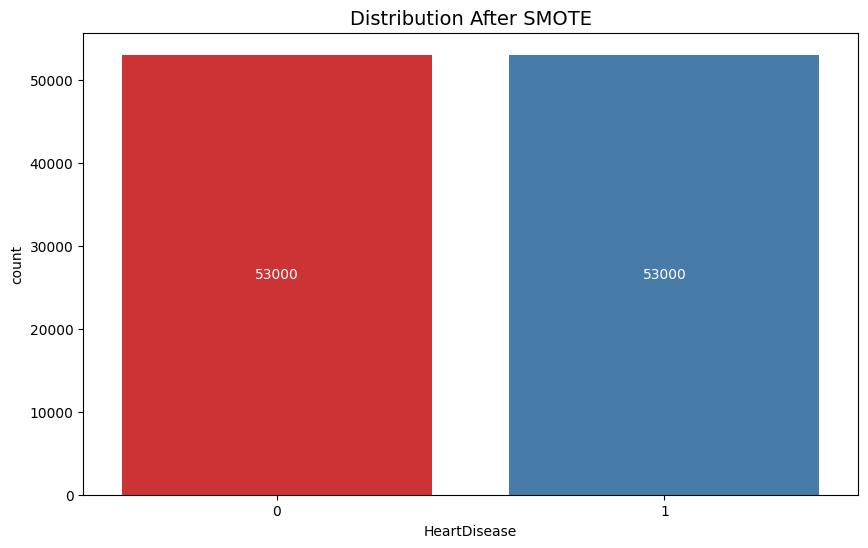

In [101]:
from  imblearn.over_sampling import SMOTE

smote = SMOTE(n_jobs=-1, random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)


plt.figure(figsize = (10,6))
ax=sns.countplot( x = y_smote , palette='Set1',)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Distribution After SMOTE", size=14)
plt.show()

In [102]:
# tuned hpyerparameters :(best parameters)  {'C': 3.593813663804626, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
# f1 score : nan

#model
X_train , X_test, y_train,  y_test = train_test_split(X_smote, y_smote, test_size=0.35, random_state=42)

# scaler= StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="sag", penalty="l2", C=3.593813663804626, max_iter=1000)
logreg_s.fit(X_train,y_train)
y_pred_log=logreg_s.predict(X_test)

# y_pred_proba_log = logreg_s.predict_proba(X_test)
# fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
# auc_log = round(metrics.auc(fpr_log, tpr_log),5)


ROS_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                              precision_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              recall_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              f1_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              # roc_auc_score(y_test, y_pred_proba_log[:,1])
                              ],
                              index=['Accuracy','Precision','Recall','F1-score'],
                              columns = ["Logestic_regression_ROS"]
                       )

ROS_log

Logestic_regression_ROS
Accuracy                  0.774690
Precision                 0.759819
Recall                    0.800812
F1-score                  0.779777

In [103]:
accuracy, precision, recall, f1 = final_test(logreg_s)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7485666666666667
Precision: 0.28771631808047565
Recall: 0.7646726862302483
F1 Score: 0.41811309110545397


##### 1.4.2 c Undersampling

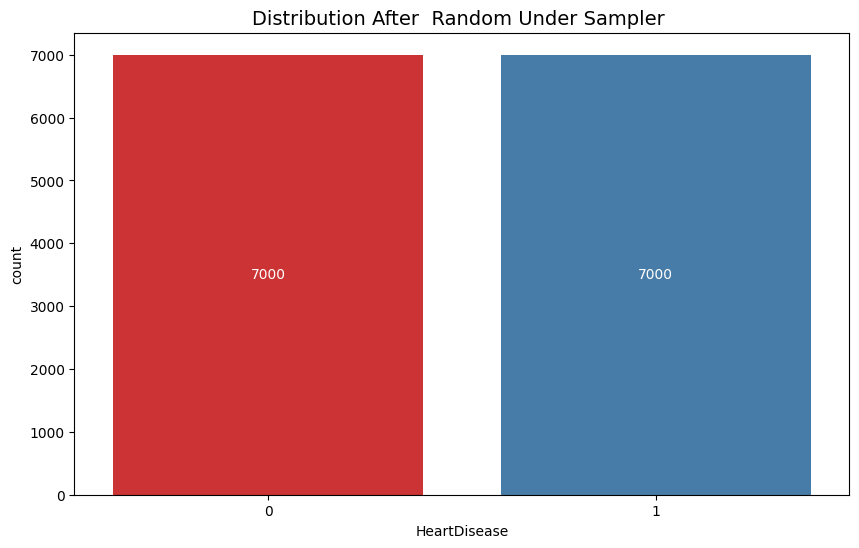

In [104]:
from  imblearn.under_sampling import RandomUnderSampler

rus  =RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)


plt.figure(figsize = (10,6))
ax=sns.countplot( x = y_rus , palette='Set1',)
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.title("Distribution After  Random Under Sampler ", size=14)
plt.show()

In [105]:
# tuned hpyerparameters :(best parameters)  {'C': 3.593813663804626, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
# f1 score : nan

#model
X_train , X_test, y_train,  y_test = train_test_split(X_rus, y_rus, test_size=0.35, random_state=42)

# scaler= StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

logreg_s=LogisticRegression(solver="sag", penalty="l2", C=3.593813663804626, max_iter=1000)
logreg_s.fit(X_train,y_train)
y_pred_log=logreg_s.predict(X_test)

# y_pred_proba_log = logreg_s.predict_proba(X_test)
# fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_pred_proba_log[:,1])
# auc_log = round(metrics.auc(fpr_log, tpr_log),5)


ROS_log = pd.DataFrame(data=[accuracy_score(y_test, y_pred_log),
                              precision_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              recall_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              f1_score(y_test, y_pred_log, average='binary', pos_label='1'),
                              # roc_auc_score(y_test, y_pred_proba_log[:,1])
                              ],
                              index=['Accuracy','Precision','Recall','F1-score'],
                              columns = ["Logestic_regression_ROS"]
                       )

ROS_log

Logestic_regression_ROS
Accuracy                  0.769184
Precision                 0.756618
Recall                    0.788066
F1-score                  0.772022

In [106]:
accuracy, precision, recall, f1 = final_test(logreg_s)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7465666666666667
Precision: 0.2869738637556419
Recall: 0.7714446952595937
F1 Score: 0.41833065564991206


In [ ]:
# def plotFeatureimportance(model, X_train, y_train):
#     # Call drop-column feature importance function
#     df_drop_column = Featureimportance(model, X_train, y_train, random_state=0)
#     # Rename columns
#     df_drop_column.columns = ['Feature', 'Feature Importance']

#     # Plot barchart
#     plt.figure(figsize=(12,10))
#     sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h',
#                               color="white",
#                               hatch='//',
#                               edgecolor="darkred",
#                               ecolor="black",
#                               linewidth=0.6,)


#     plt.xlabel("Feature Importance", size=16)
#     plt.ylabel("Feature", size=16)
#     plt.title(' Feature Importance', fontsize=20)
#     plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler

def model_hypertun(model, param_grid, X, y):


    skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)




    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.35)
    # scaler= StandardScaler()
    # scaler.fit(x_train)

    # X_train_scaled = scaler.transform(x_train)
    # X_test_scaled = scaler.transform(x_test)



    model_grid = HalvingGridSearchCV(model, param_grid, factor=3,cv=skf, n_jobs=-1,random_state=42,verbose=1,
                                         scoring='f1',return_train_score=True)


    model_grid.fit(x_train,y_train)




    print("tuned hpyerparameters :(best parameters) ",model_grid.best_params_)
    print("f1 score :",model_grid.best_score_)

    return model_grid.best_estimator_


In [108]:
logreg=LogisticRegression()
grid =          [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'penalty':['none'],
                  "max_iter":[1000,5000,10000]},
                 {'solver':['lbfgs', 'newton-cg', 'sag'], 'penalty':['l2'],
                  'C': np.logspace(-5, 5, 10), "max_iter":[1000,5000,10000]},
                 {'solver':['liblinear', 'saga'], 'penalty': ['l1', 'l2'],
                  'C': np.logspace(-5, 5, 10), "max_iter":[1000,5000,10000]},
                 {'solver':['saga'], 'penalty':['elasticnet'], 'C': np.logspace(-5, 5, 10),
                  'l1_ratio': np.arange(0,1.1,0.1), "max_iter":[1000,5000,10000]}]


# logestic_simple=model_hypertun(logreg,grid, X, y)
logestic_simple=model_hypertun(logreg, grid, X, y)

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 160
max_resources_: 39000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 552
n_resources: 160
Fitting 7 folds for each of 552 candidates, totalling 3864 fits
----------
iter: 1
n_candidates: 184
n_resources: 480
Fitting 7 folds for each of 184 candidates, totalling 1288 fits
----------
iter: 2
n_candidates: 62
n_resources: 1440
Fitting 7 folds for each of 62 candidates, totalling 434 fits
----------
iter: 3
n_candidates: 21
n_resources: 4320
Fitting 7 folds for each of 21 candidates, totalling 147 fits
----------
iter: 4
n_candidates: 7
n_resources: 12960
Fitting 7 folds for each of 7 candidates, totalling 49 fits
tuned hpyerparameters :(best parameters)  {'C': 0.0016681005372000592, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}
f1 score : nan


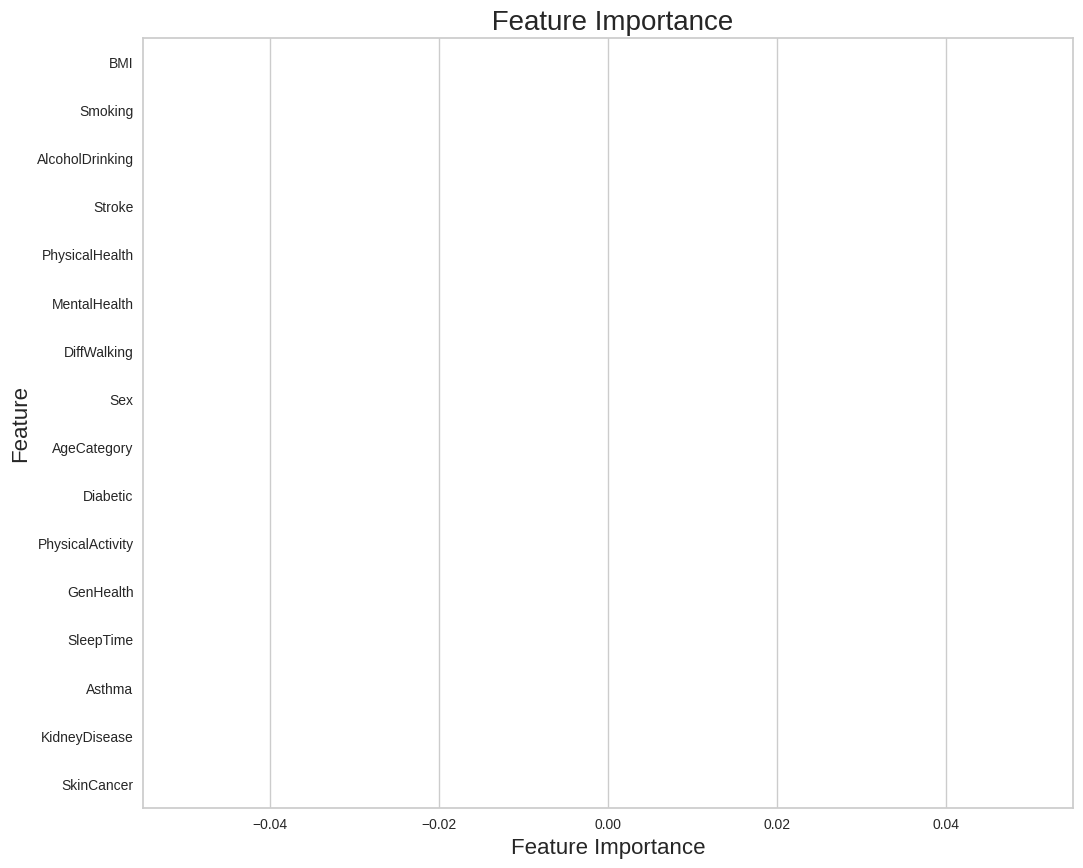

In [ ]:
X_train , X_test, y_train,  y_test = train_test_split(X, y, test_size=0.35, random_state=0)

plotFeatureimportance(logestic_simple, X_train, y_train)


### AutoML

In [ ]:
### Trying AutoML
!pip install pycaret


In [ ]:
from pycaret.classification import *

In [ ]:
#raw_diabetes_datasets=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Neha_Semester2/Neha_Gupta_Advanced_ML_Assignment_1/diabetes.csv')
# Data set above

In [ ]:
data_name = setup(data = raw_diabetes_datasets,  target = 'HeartDisease', session_id=42)

In [ ]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## 1.6 Model Training

In [ ]:
from sklearn. metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       135
           1       0.77      0.51      0.61        65

    accuracy                           0.79       200
   macro avg       0.78      0.72      0.73       200
weighted avg       0.79      0.79      0.78       200



In [ ]:
# y_true are the true labels
# y_pred are the labels predicted by the model
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Class 0', 'Class 1'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Class 0', 'Class 1'], rotation=0)
plt.show()